Breast Cancer prediction Using Machine Learning

In [2]:
# Importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [4]:
#Importing the dataset
df = pd.read_csv("bc.csv")
print(df)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

Preprocessing and Feature Engineering

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
df.isna().sum().sort_values(ascending = False)

Unnamed: 32                569
id                           0
diagnosis                    0
texture_mean                 0
radius_mean                  0
area_mean                    0
smoothness_mean              0
compactness_mean             0
perimeter_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
concavity_mean               0
smoothness_se                0
compactness_se               0
concave points_se            0
concavity_se                 0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
symmetry_se                  0
perimeter_worst              0
area_worst                   0
compactness_worst            0
smoothness_worst             0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_

In [9]:
df = df.drop(['Unnamed: 32', 'id'], axis=1)

In [10]:
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
X = df.drop(['diagnosis'], axis=1)

In [12]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
y = df['diagnosis']
print(y)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


In [14]:
print("Shape of X", X.shape)
print("Shape of y", y.shape)

Shape of X (569, 30)
Shape of y (569,)


In [15]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [16]:
X_corr = X.corr()
X_corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [17]:
y = y.map({"M":1, "B":0})

In [18]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [19]:
count = y.value_counts()

In [20]:
count

diagnosis
0    357
1    212
Name: count, dtype: int64

In [21]:
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

Visualizing the dataset

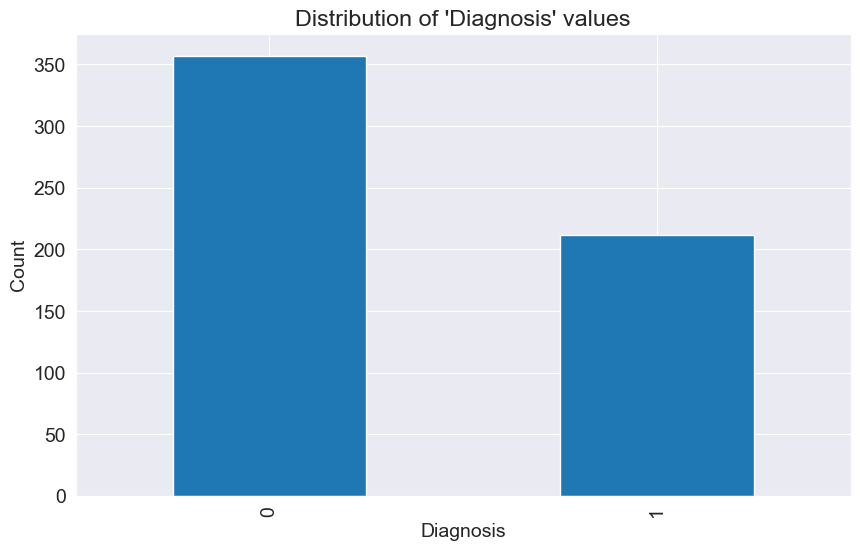

In [22]:
count.plot(kind='bar');
plt.title("Distribution of 'Diagnosis' values")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

In [23]:
mean_values = X[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','concavity_mean']]

In [24]:
mean_values

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,concavity_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.14710,0.2419,0.07871,0.30010
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.07017,0.1812,0.05667,0.08690
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.12790,0.2069,0.05999,0.19740
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.10520,0.2597,0.09744,0.24140
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.10430,0.1809,0.05883,0.19800
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.13890,0.1726,0.05623,0.24390
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.09791,0.1752,0.05533,0.14400
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.05302,0.1590,0.05648,0.09251
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.15200,0.2397,0.07016,0.35140


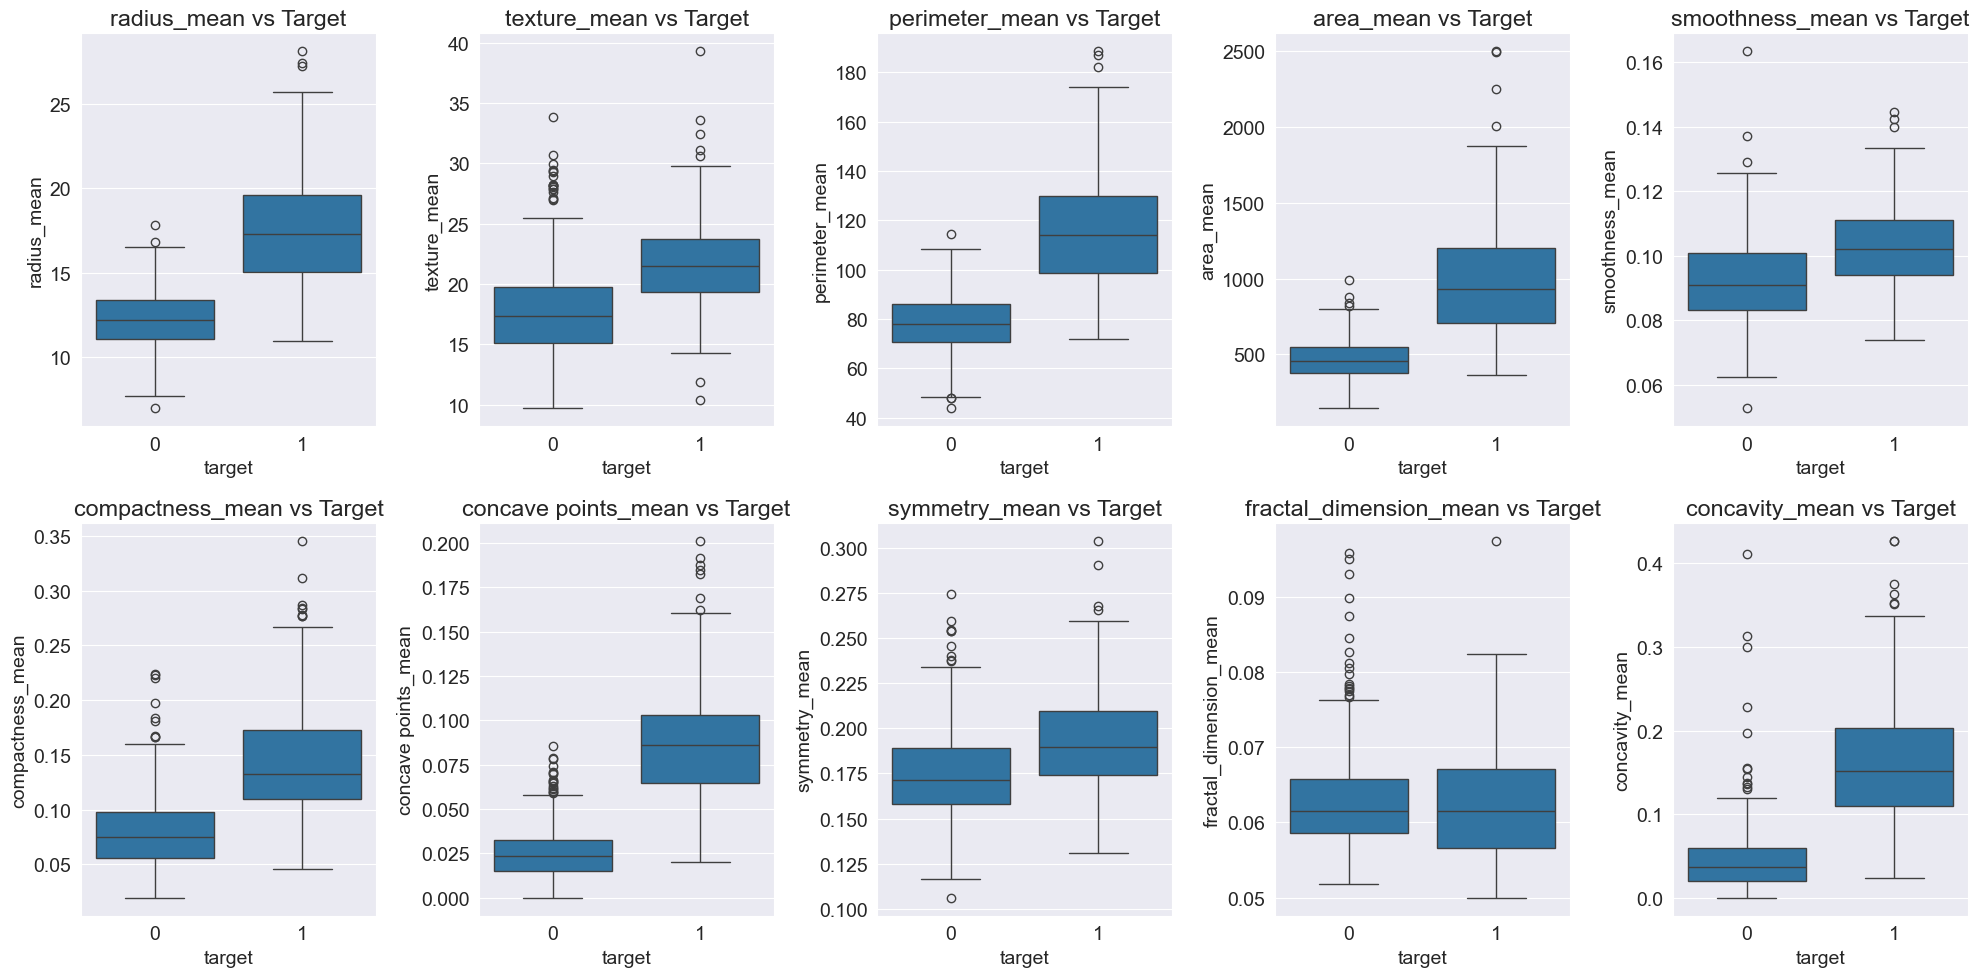

In [25]:
target = y

# Combine the features and target into a single DataFrame for plotting
plot_data = mean_values.copy()
plot_data['target'] = target

# Define the features
features = mean_values.columns

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))  # Adjust the layout as necessary
axes = axes.flatten()

# Plot each feature against the target variable
for i, feature in enumerate(features):
    sns.boxplot(x='target', y=feature, data=plot_data, ax=axes[i])
    axes[i].set_title(f'{feature} vs Target')

# Adjust layout
plt.tight_layout()
plt.show()

In [26]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [27]:
standard_error_values = X[['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']]

In [28]:
standard_error_values

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
3,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
4,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...
564,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239
565,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498
566,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892
567,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185


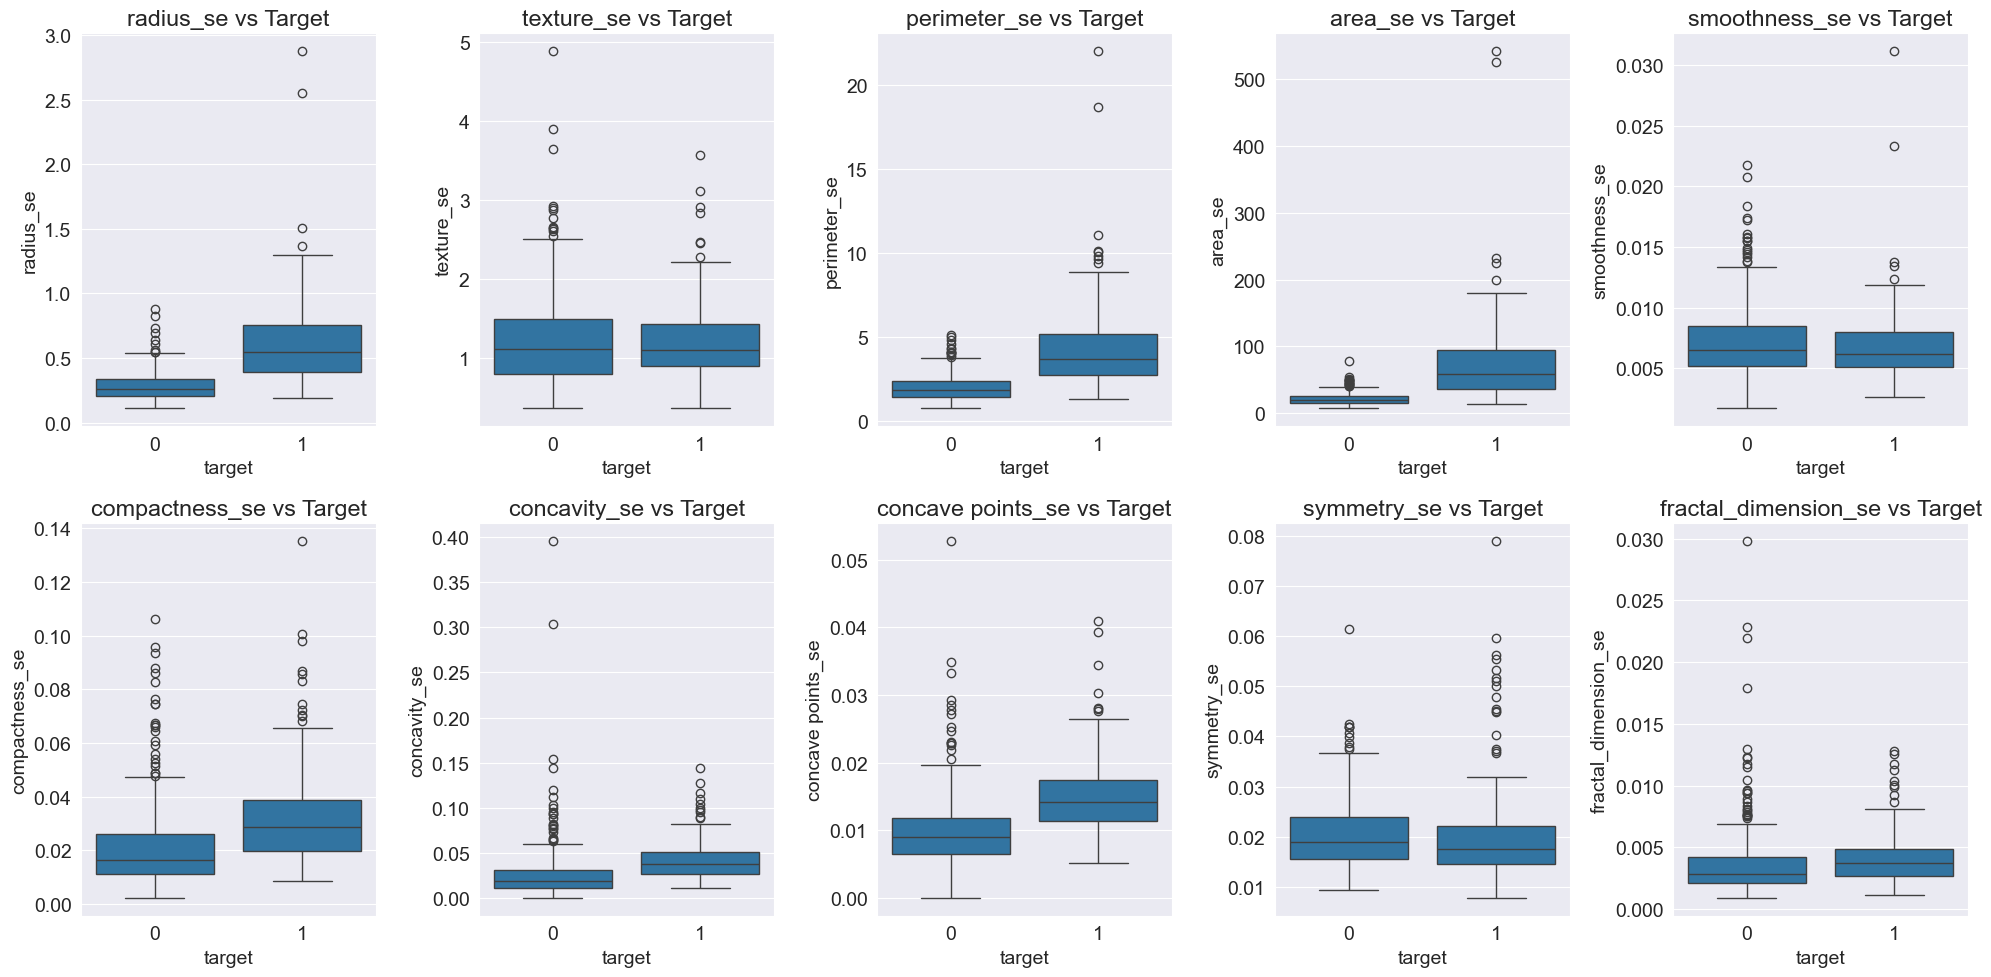

In [29]:
target = y

# Combine the features and target into a single DataFrame for plotting
plot_data2 = standard_error_values.copy()
plot_data2['target'] = target

# Define the features
features = standard_error_values.columns

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))  # Adjust the layout as necessary
axes = axes.flatten()

# Plot each feature against the target variable
for i, feature in enumerate(features):
    sns.boxplot(x='target', y=feature, data=plot_data2, ax=axes[i])
    axes[i].set_title(f'{feature} vs Target')

# Adjust layout
plt.tight_layout()
plt.show()

In [30]:
largest_mean_values = X[['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

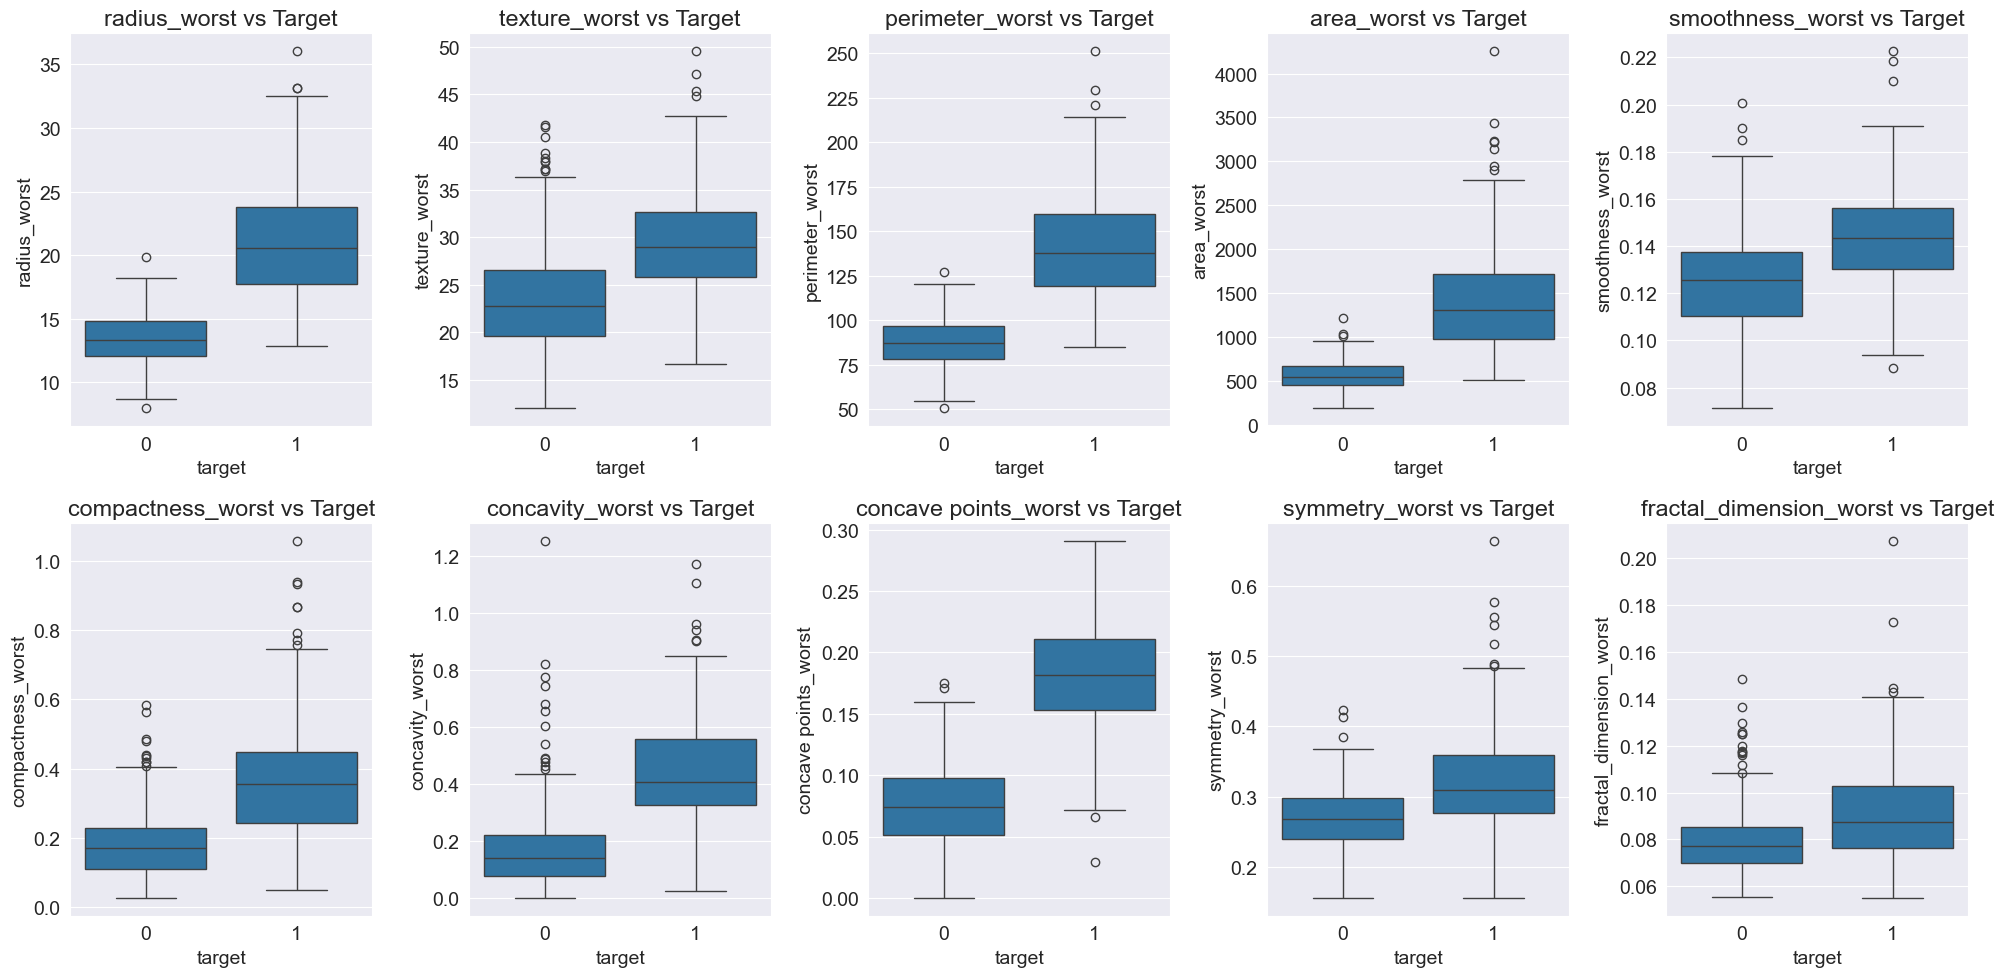

In [31]:
target = y

# Combine the features and target into a single DataFrame for plotting
plot_data = largest_mean_values.copy()
plot_data['target'] = target

# Define the features
features = largest_mean_values.columns

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))  # Adjust the layout as necessary
axes = axes.flatten()

# Plot each feature against the target variable
for i, feature in enumerate(features):
    sns.boxplot(x='target', y=feature, data=plot_data, ax=axes[i])
    axes[i].set_title(f'{feature} vs Target')

# Adjust layout
plt.tight_layout()

plt.show()

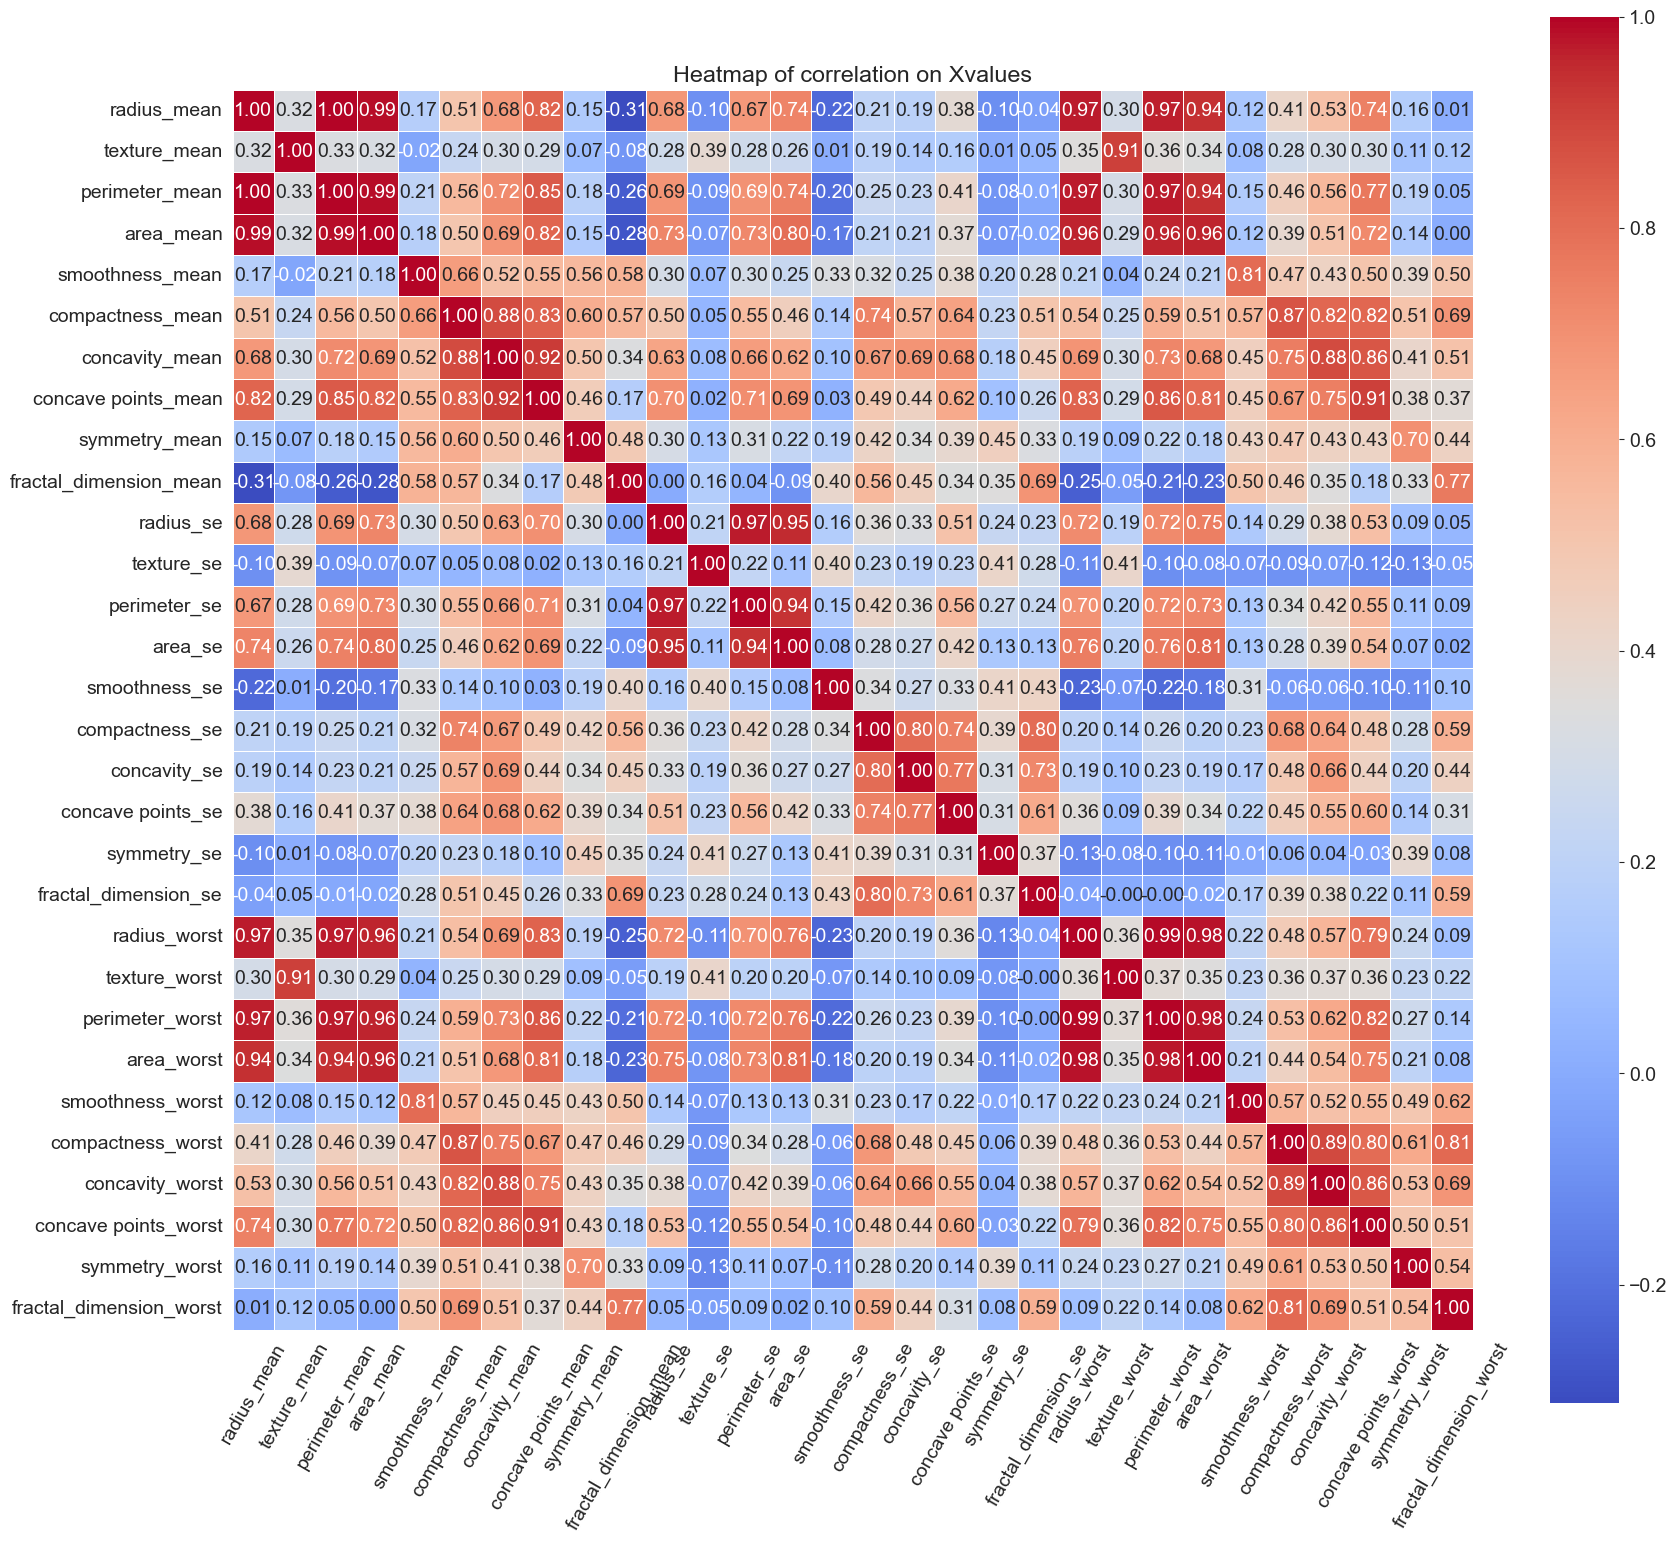

In [32]:
plt.figure(figsize=(20, 18))
sns.heatmap(X_corr, cmap='coolwarm', annot=True, fmt='.2f', square=True, linewidths=.5)
plt.title('Heatmap of correlation on Xvalues')
plt.xticks(rotation=60)
plt.show()


Spliting data into Train and Testing set

In [33]:
from sklearn.model_selection import train_test_split

In [61]:
num_columns = X.shape[1]
print("Number of columns:", num_columns)


Number of columns: 30


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state =42)

In [35]:
print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (455, 30)
Shape of X_test (114, 30)
Shape of y_train (455,)
Shape of y_test (114,)


In [36]:
from sklearn.preprocessing import StandardScaler
# Scale the features
scaler = StandardScaler()


In [37]:
scaler.fit(X_train)

StandardScaler()

In [38]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [40]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
# Now you can access the feature importances
importances = classifier_rf.feature_importances_

# Create a DataFrame for easier inspection
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the features by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print(feature_importances_df)

                    Feature  Importance
23               area_worst    0.154737
27     concave points_worst    0.153030
7       concave points_mean    0.105276
20             radius_worst    0.075895
22          perimeter_worst    0.069279
6            concavity_mean    0.068214
2            perimeter_mean    0.057780
0               radius_mean    0.052071
3                 area_mean    0.048886
26          concavity_worst    0.030570
10                radius_se    0.022150
13                  area_se    0.020974
25        compactness_worst    0.019071
21            texture_worst    0.018127
5          compactness_mean    0.013331
1              texture_mean    0.013149
24         smoothness_worst    0.010391
12             perimeter_se    0.009725
28           symmetry_worst    0.007947
16             concavity_se    0.006454
29  fractal_dimension_worst    0.005827
4           smoothness_mean    0.005733
19     fractal_dimension_se    0.004493
11               texture_se    0.004372


Total number of features: 30
                    Feature  Importance
23               area_worst    0.154737
27     concave points_worst    0.153030
7       concave points_mean    0.105276
20             radius_worst    0.075895
22          perimeter_worst    0.069279
6            concavity_mean    0.068214
2            perimeter_mean    0.057780
0               radius_mean    0.052071
3                 area_mean    0.048886
26          concavity_worst    0.030570
10                radius_se    0.022150
13                  area_se    0.020974
25        compactness_worst    0.019071
21            texture_worst    0.018127
5          compactness_mean    0.013331
1              texture_mean    0.013149
24         smoothness_worst    0.010391
12             perimeter_se    0.009725
28           symmetry_worst    0.007947
16             concavity_se    0.006454
29  fractal_dimension_worst    0.005827
4           smoothness_mean    0.005733
19     fractal_dimension_se    0.004493
11         

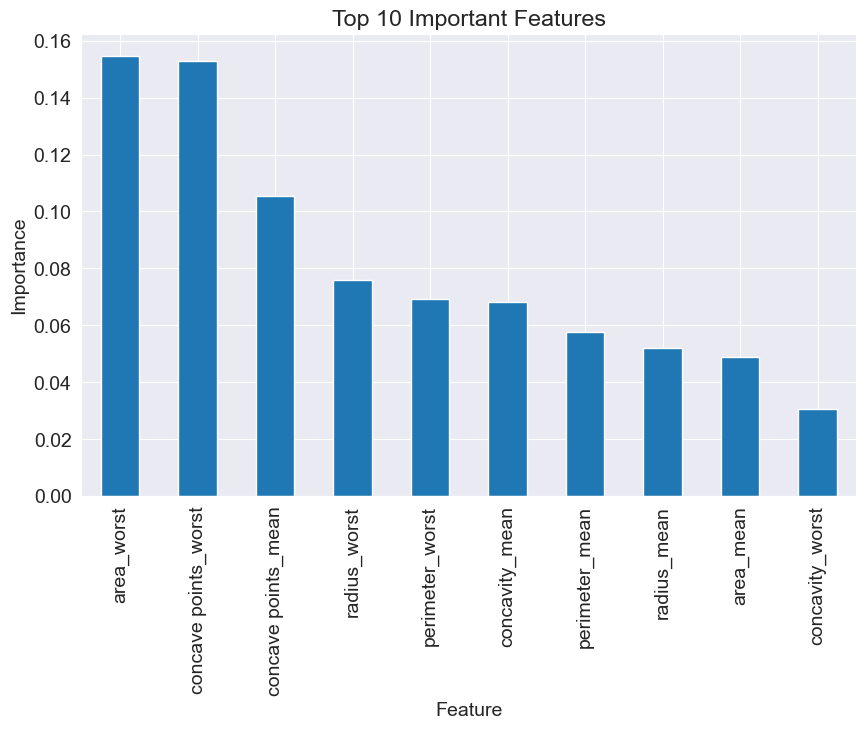

In [68]:
# Assuming feature_importances_df is already created with 'Feature' and 'Importance' columns

# Count the number of features
feature_count = len(feature_importances_df)
print(f'Total number of features: {feature_count}')

# Display sorted feature importances
sorted_feature_importances = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the sorted DataFrame
print(sorted_feature_importances)

# If you want to visualize the most important features, you can plot them (optional)
import matplotlib.pyplot as plt

# Plot the top 10 important features
top_n = 10
sorted_feature_importances.head(top_n).plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Top 10 Important Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()


In [41]:
rf_preds = classifier_rf.predict(X_test)

In [42]:
rf_preds

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [66]:
# Assuming X_train and y_train are already defined
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Initialize the RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100)

# Fit the model on training data
classifier_rf.fit(X_train, y_train)

# Now you can access the feature importances
importances = classifier_rf.feature_importances_

# Create a DataFrame for easier inspection
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the features by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print(feature_importances_df)


                    Feature  Importance
23               area_worst    0.154737
27     concave points_worst    0.153030
7       concave points_mean    0.105276
20             radius_worst    0.075895
22          perimeter_worst    0.069279
6            concavity_mean    0.068214
2            perimeter_mean    0.057780
0               radius_mean    0.052071
3                 area_mean    0.048886
26          concavity_worst    0.030570
10                radius_se    0.022150
13                  area_se    0.020974
25        compactness_worst    0.019071
21            texture_worst    0.018127
5          compactness_mean    0.013331
1              texture_mean    0.013149
24         smoothness_worst    0.010391
12             perimeter_se    0.009725
28           symmetry_worst    0.007947
16             concavity_se    0.006454
29  fractal_dimension_worst    0.005827
4           smoothness_mean    0.005733
19     fractal_dimension_se    0.004493
11               texture_se    0.004372


In [44]:
from sklearn.metrics import accuracy_score,  mean_squared_error

In [45]:
accuracy_score(y_test,rf_preds)

0.9649122807017544

In [46]:
rf_preds_rmse = mean_squared_error(rf_preds,  y_test)

In [47]:
rf_preds_rmse

0.03508771929824561

In [49]:
classifier_rf.oob_score_

0.9582417582417583

In [50]:
!pip install xgboost folium --upgrade --quiet

In [51]:
#from xgboost.xgbclassifier import XGBClassifier
from xgboost import XGBClassifier

In [52]:
xgb = XGBClassifier(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [53]:
xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse) 

# classification model
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
#confusion = confusion_matrix(y_test, y_pred)
#classification_rep = classification_report(y_test, y_pred)

Mean Squared Error: 0.043859649122807015


In [54]:
accuracy

0.956140350877193

In [55]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()

In [56]:
lm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse) 

# classification model
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)

Mean Squared Error: 0.043859649122807015


In [57]:
accuracy

0.956140350877193

In [69]:
input_text = (-0.4976419 ,  0.61365274, -0.49813131, -0.53102815, -0.57694824,
       -0.17494424, -0.36215622, -0.284859  ,  0.43345165,  0.17818232,
       -0.36844966,  0.55310406, -0.31671104, -0.40524636,  0.04025752,
       -0.03795529, -0.18043065,  0.16478901, -0.12170969,  0.23079329,
       -0.50044002,  0.81940367, -0.46922838, -0.53308833, -0.04910117,
       -0.04160193, -0.14913653,  0.09681787,  0.10617647,  0.49035329)
np_df = np.asarray(input_text)
predicition = classifier_rf.predict(np_df.reshape(1,-1))

if predicition[0] ==1:
    print("Cancrous")
else:
    print("Not Cancrous")
 

Not Cancrous


In [59]:
import pickle
pickle.dump(classifier_rf,open('model.pkl','wb'))